In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
df= pd.read_excel (r'C:\Users\Name\Desktop\4.2 ödevler\veri madenciliği\churn\\excel.xlsx')
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Card_Type,Point_Earned,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,DIAMOND,300,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,5,PLATINUM,771,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,3,SILVER,564,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,2,GOLD,339,1


In [4]:
df.shape

(10000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Complain            10000 non-null  int64  
 13  Satisfaction_Score  10000 non-null  int64  
 14  Card_Type           10000 non-null  object 
 15  Point_Earned        10000 non-null  int64  
 16  Exite

In [6]:
print ('\nUnique values :  \n', df.nunique())


Unique values :  
 CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Complain                  2
Satisfaction_Score        5
Card_Type                 4
Point_Earned            785
Exited                    2
dtype: int64


In [7]:
df[df.columns[1:]].describe(exclude=[object])

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Point_Earned,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.204400,3.013800,606.515100,0.203800
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.403283,1.405919,225.924839,0.402842
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,1.000000,119.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,2.000000,410.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,3.000000,605.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,4.000000,801.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,5.000000,1000.000000,1.000000


In [8]:
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

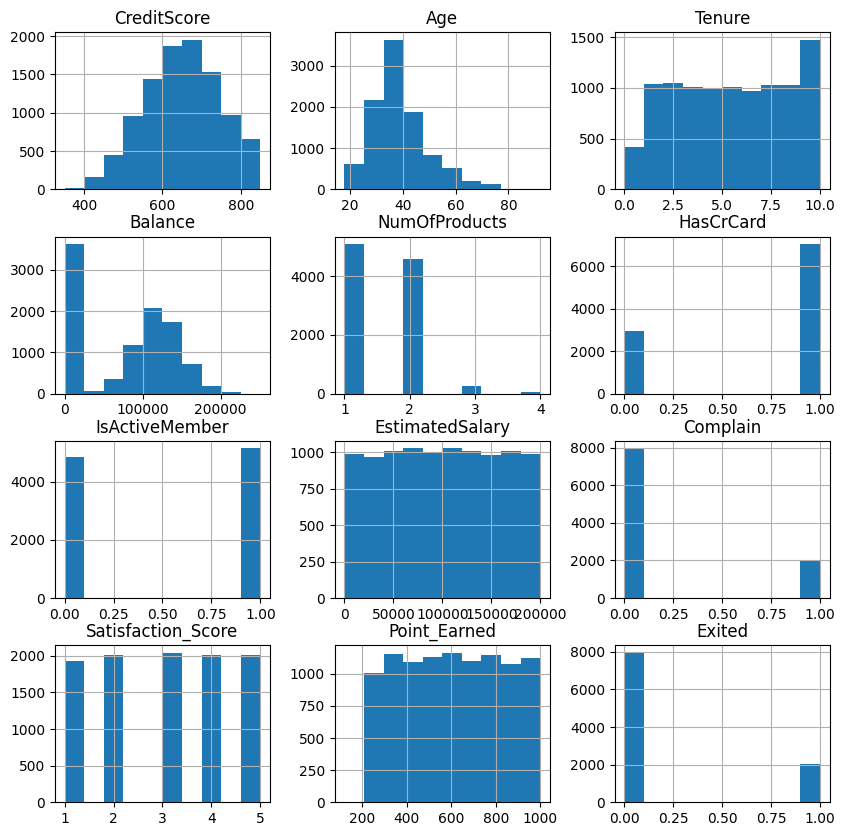

In [9]:
df[df.columns[1:]].hist(bins=10,figsize=(10,10))
plt.show()

0    7962
1    2038
Name: Exited, dtype: int64


Text(0.5, 1.0, 'Churn')

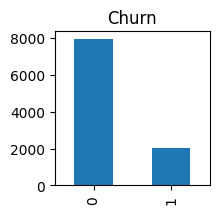

In [10]:
print(df.Exited.value_counts())
df['Exited'].value_counts().plot(kind='bar', figsize= [2,2]).set_title('Churn')

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Text(0.5, 1.0, 'Geography')

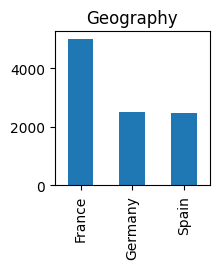

In [11]:
print(df.Geography.value_counts())
df['Geography'].value_counts().plot(kind='bar', figsize= [2,2]).set_title('Geography')

Male      5457
Female    4543
Name: Gender, dtype: int64


Text(0.5, 1.0, 'Gender')

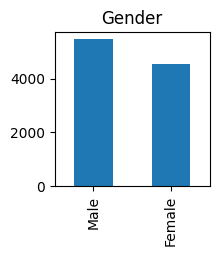

In [12]:
print(df.Gender.value_counts())
df['Gender'].value_counts().plot(kind='bar', figsize= [2,2]).set_title('Gender')

1    7055
0    2945
Name: HasCrCard, dtype: int64


Text(0.5, 1.0, 'HasCrCard')

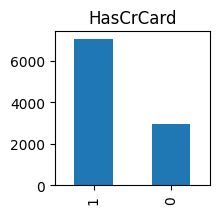

In [13]:
print(df.HasCrCard.value_counts())
df['HasCrCard'].value_counts().plot(kind='bar', figsize= [2,2]).set_title('HasCrCard')

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card_Type, dtype: int64


Text(0.5, 1.0, 'Card_Type')

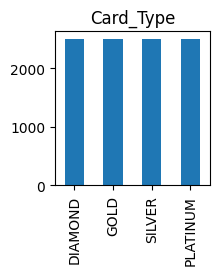

In [14]:
print(df.Card_Type.value_counts())
df['Card_Type'].value_counts().plot(kind='bar', figsize= [2,2]).set_title('Card_Type')

1    5151
0    4849
Name: IsActiveMember, dtype: int64


Text(0.5, 1.0, 'IsActiveMember')

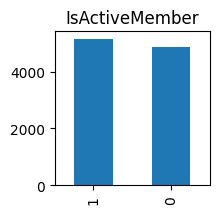

In [15]:
print(df.IsActiveMember.value_counts())
df['IsActiveMember'].value_counts().plot(kind='bar', figsize= [2,2]).set_title('IsActiveMember')

1    7055
0    2945
Name: HasCrCard, dtype: int64


Text(0.5, 1.0, 'HasCrCard')

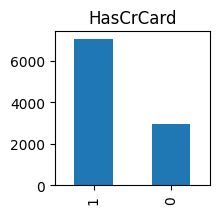

In [16]:
print(df.HasCrCard.value_counts())
df['HasCrCard'].value_counts().plot(kind='bar', figsize= [2,2]).set_title('HasCrCard')

In [17]:
pd.crosstab(df.HasCrCard,df.Exited)

Exited,0,1
HasCrCard,,
0,2332,613
1,5630,1425


In [18]:
pd.crosstab(df.Gender,df.Exited)

Exited,0,1
Gender,,
Female,3404,1139
Male,4558,899


In [19]:
pd.crosstab(df.Geography,df.Exited)

Exited,0,1
Geography,,
France,4203,811
Germany,1695,814
Spain,2064,413


<Axes: xlabel='Exited', ylabel='Geography'>

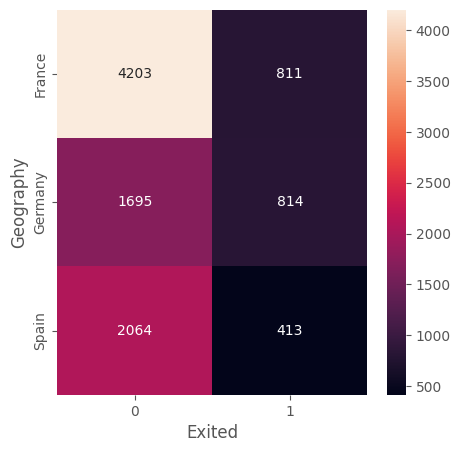

In [26]:
group = df.groupby(['Geography', 'Exited'])
Geography_Exited = group.size().unstack()
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (5,5))
sns.heatmap(Geography_Exited, annot = True, fmt ="d")

<Axes: >

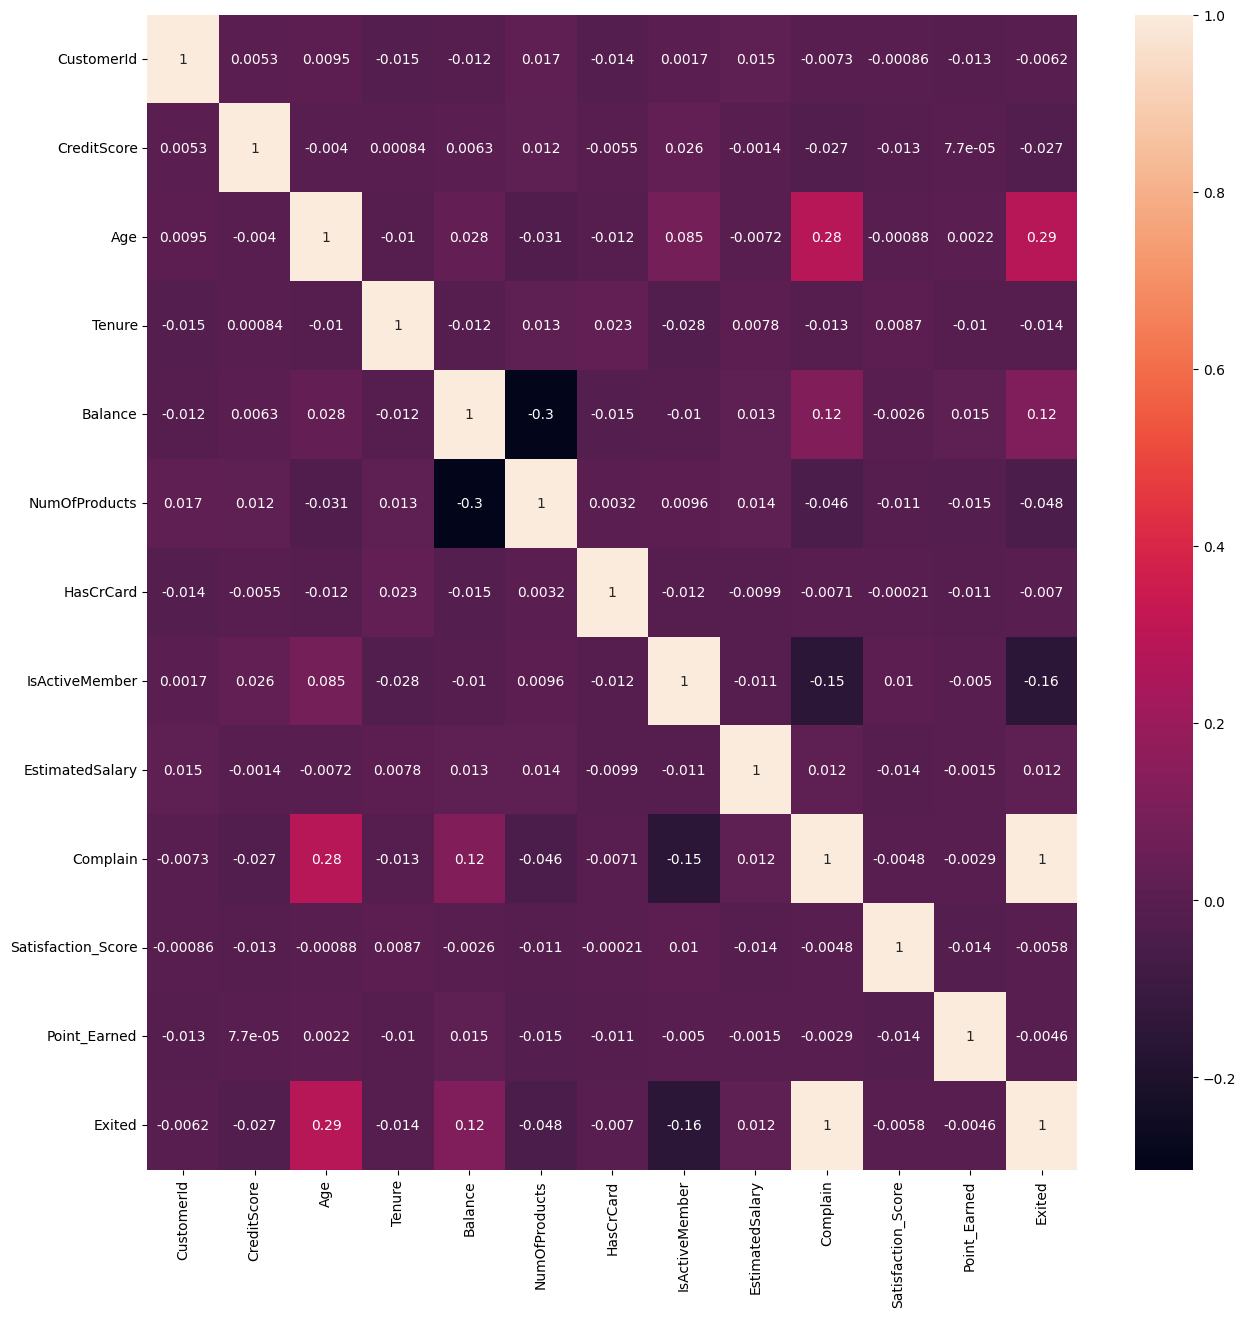

In [21]:
correlation = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(correlation,annot = True)

Geography
France     3543
Germany    1791
Spain      1721
Name: HasCrCard, dtype: int64


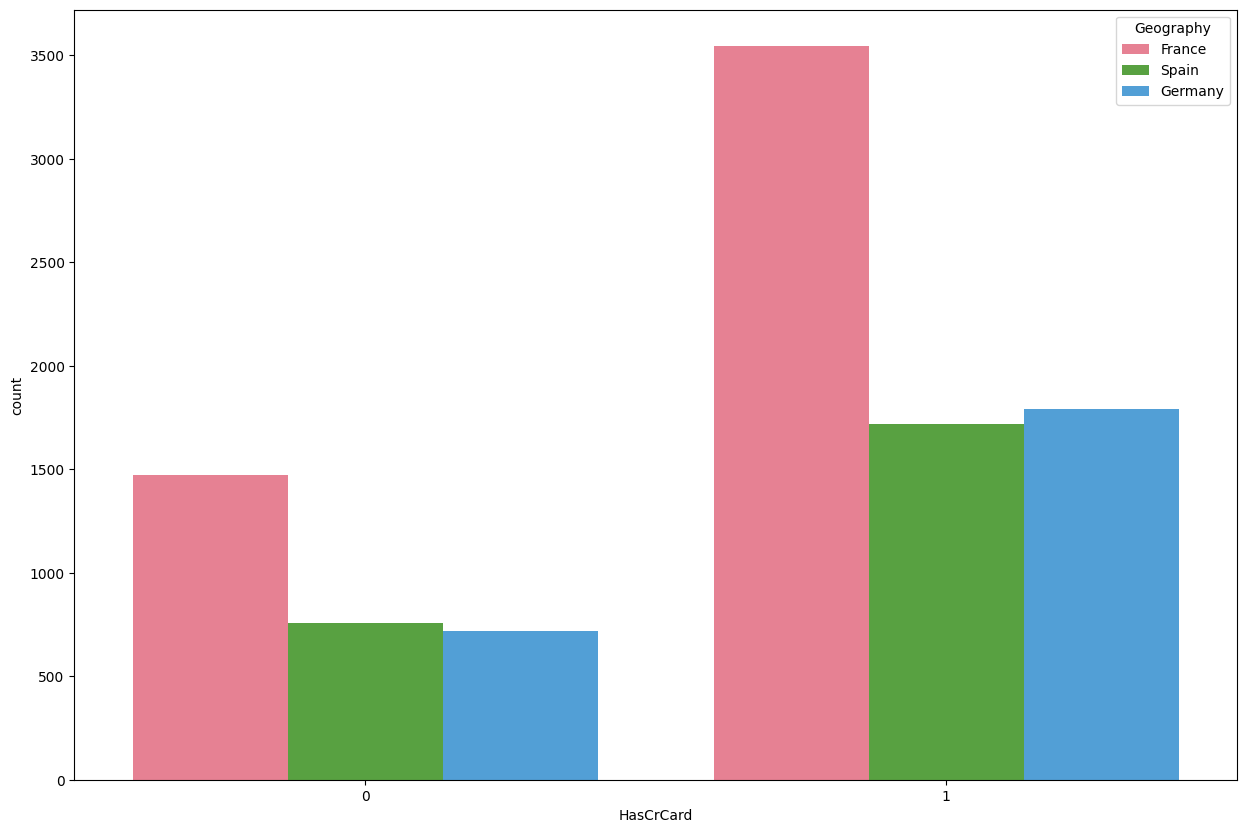

In [22]:
plt.figure(figsize = (15,10)) 
sns.countplot(x="HasCrCard",hue = "Geography", data=df, palette="husl")
print(df.groupby('Geography')["HasCrCard"].sum()) 

In [24]:
avarage_salaries = df.groupby("Geography").mean()["EstimatedSalary"]
print("Avarage Salaries according to Countries:\n", avarage_salaries)

Avarage Salaries according to Countries:
 Geography
France      99899.180814
Germany    101113.435102
Spain       99440.572281
Name: EstimatedSalary, dtype: float64


Text(0, 0.5, 'Number of Credit Card Users')

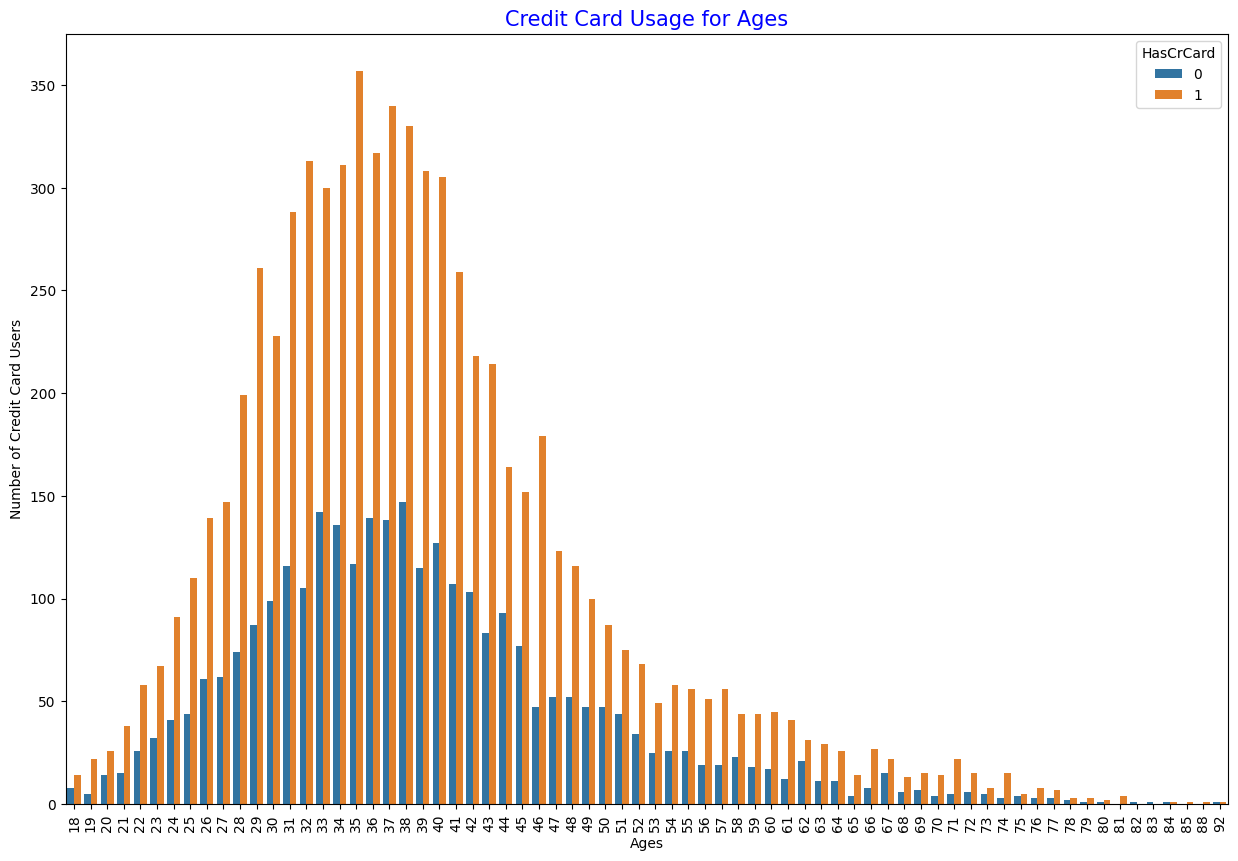

In [25]:
plt.figure(figsize = (15,10)) 
plt.xticks(rotation=90)
plt.title('Credit Card Usage for Ages',color = 'blue',fontsize=15)
sns.countplot(x=df["Age"],hue ='HasCrCard',data=df);
plt.xlabel('Ages')
plt.ylabel('Number of Credit Card Users')

Text(0, 0.5, 'Number of customers (Exited or not)')

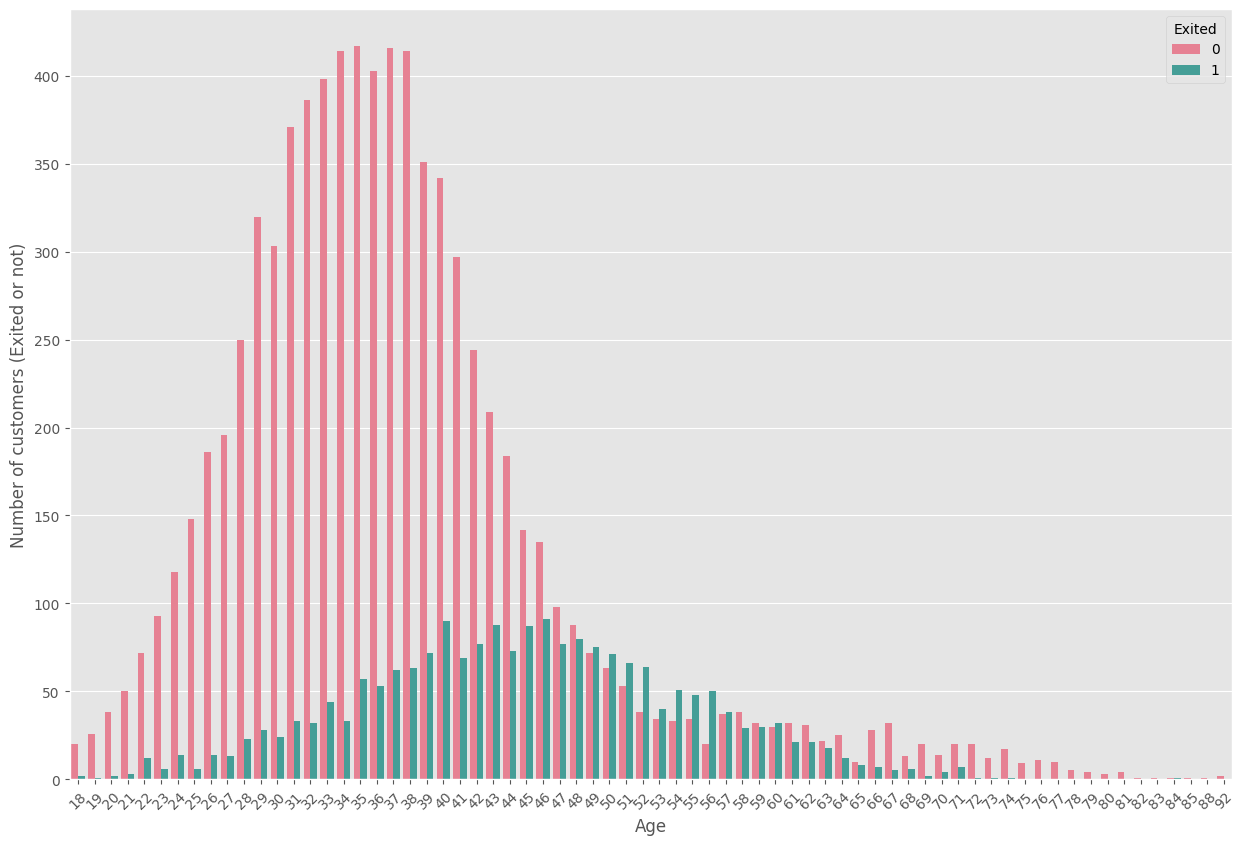

In [27]:
plt.figure(figsize = (15,10)) 
plt.xticks(rotation=45)
sns.countplot(x=df["Age"],hue = 'Exited',data=df, palette="husl")
plt.xlabel('Age')
plt.ylabel('Number of customers (Exited or not)')

In [28]:
df.isnull().sum()

CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction_Score    0
Card_Type             0
Point_Earned          0
Exited                0
dtype: int64

In [29]:
data= df.copy()

In [30]:
data.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Card_Type,Point_Earned,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456,0


In [31]:
data.drop(['CustomerId','Surname'], axis=1 ,inplace = True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Complain            10000 non-null  int64  
 11  Satisfaction_Score  10000 non-null  int64  
 12  Card_Type           10000 non-null  object 
 13  Point_Earned        10000 non-null  int64  
 14  Exited              10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

In [34]:
data.Card_Type.unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [35]:
data.Satisfaction_Score.unique()

array([2, 3, 5, 4, 1], dtype=int64)

In [37]:
data['Geography']=data['Geography'].map({'France':1,'Spain':3,'Germany':2})
data['Gender']=data['Gender'].map({'Male':1,'Female':0})
data['Card_Type']=data['Card_Type'].map({'DIAMOND':3, 'GOLD':1, 'SILVER':0, 'PLATINUM':2})

In [38]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Card_Type,Point_Earned,Exited
0,619,1,0,42,2,0.00,1,1,1,101348.88,1,2,3,464,1
1,608,3,0,41,1,83807.86,1,0,1,112542.58,1,3,3,456,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1,3,3,377,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0,5,1,350,0
4,850,3,0,43,2,125510.82,1,1,1,79084.10,0,5,1,425,0
5,645,3,1,44,8,113755.78,2,1,0,149756.71,1,5,3,484,1
6,822,1,1,50,7,0.00,2,1,1,10062.80,0,2,0,206,0
7,376,2,0,29,4,115046.74,4,1,0,119346.88,1,2,3,282,1
8,501,1,1,44,4,142051.07,2,0,1,74940.50,0,3,1,251,0
9,684,1,1,27,2,134603.88,1,1,1,71725.73,0,3,1,342,0


In [39]:
data.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction_Score,Card_Type,Point_Earned,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027048,-0.012599,-0.002511,0.000077,-0.026771
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035830,-0.001718,0.011109,-0.008479,0.035712
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106287,0.000242,-0.009805,-0.013225,-0.106267
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.283530,-0.000876,0.008476,0.002222,0.285296
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.013047,0.008663,-0.010611,-0.010196,-0.013656
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.119124,-0.002588,0.023472,0.014608,0.118577
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.046357,-0.011394,-0.009054,-0.015330,-0.047611
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007095,-0.000212,0.000064,-0.011041,-0.006976
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.154741,0.010236,-0.019001,-0.004983,-0.156356
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012494,-0.013747,-0.015671,-0.001515,0.012490


In [41]:
data[(data['Complain']==0)&(data['Exited']==0)].shape[0]

7952

In [42]:
data[(data['Complain']==1)&(data['Exited']==1)].shape[0]

2034

In [43]:
data[(data['Complain']==0)&(data['Exited']==1)].shape[0]

4

In [44]:
data[(data['Complain']==1)&(data['Exited']==0)].shape[0]

10

In [45]:
print(classification_report(data['Complain'], data['Exited']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7956
           1       1.00      1.00      1.00      2044

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [46]:
data.drop(columns=['Complain'],inplace=True)

In [47]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [48]:
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  int64  
 2   Gender              10000 non-null  int64  
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Satisfaction_Score  10000 non-null  int64  
 11  Card_Type           10000 non-null  int64  
 12  Point_Earned        10000 non-null  int64  
 13  Exited              10000 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)


In [51]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [52]:
X_train.shape

(7000, 13)

In [53]:
X_train

array([[-0.34459497,  1.50730692, -1.09823226, ..., -1.42878813,
         1.33666639,  0.4521261 ],
       [-0.09518109,  0.30201238, -1.09823226, ..., -0.00751246,
        -0.45614157,  0.89391073],
       [-0.94734518, -0.90328217,  0.91055421, ..., -0.00751246,
         1.33666639, -1.72109733],
       ...,
       [ 0.86090545, -0.90328217, -1.09823226, ...,  1.41376322,
        -1.35254554,  0.32271443],
       [ 0.15423279, -0.90328217,  0.91055421, ..., -0.00751246,
         1.33666639,  0.33163938],
       [ 0.46600014,  0.30201238,  0.91055421, ...,  0.70312538,
         1.33666639,  0.14867806]])

In [54]:
Y_train

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

# Train

In [55]:
r=26
DTclassifier = DecisionTreeClassifier(criterion = 'entropy',random_state=r)
XGBoostclassifier = XGBClassifier()
RandomForestclassifier = RandomForestClassifier(criterion = 'entropy')
SVMclassifier = SVC(kernel='rbf',probability=True)
LOGISTICclassifier = LogisticRegression()
KNNclassifier = KNeighborsClassifier()
GNBclassifier = GaussianNB() 
NeuralNetworkClassifier= MLPClassifier(random_state=r)

In [56]:
DTclassifier.fit(X_train, Y_train)
XGBoostclassifier.fit(X_train, Y_train)
RandomForestclassifier.fit(X_train, Y_train)
SVMclassifier.fit(X_train, Y_train)
LOGISTICclassifier.fit(X_train, Y_train)
KNNclassifier.fit(X_train, Y_train)
GNBclassifier.fit(X_train, Y_train)
NeuralNetworkClassifier.fit(X_train, Y_train)

MLPClassifier(random_state=26)

In [57]:
DTpred = DTclassifier.predict(X_test)
XGBpred = XGBoostclassifier.predict(X_test)
RFpred = RandomForestclassifier.predict(X_test)
SVMpred = SVMclassifier.predict(X_test)
LOGISTICpred = LOGISTICclassifier.predict(X_test)
KNNpred = KNNclassifier.predict(X_test)
GNBpred = GNBclassifier.predict(X_test)
NNpred= NeuralNetworkClassifier.predict(X_test)

In [58]:
DTaccuracy = accuracy_score(Y_test, DTpred)
print("Accuracy of the Decision Tree Classifier: ",DTaccuracy)

XGBaccuracy = accuracy_score(Y_test, XGBpred)
print("Accuracy of the XGBoost Classifier: ",XGBaccuracy)

RFaccuracy = accuracy_score(Y_test, RFpred)
print("Accuracy of the Random Forest Classifier: ",RFaccuracy)

SVMaccuracy = accuracy_score(Y_test, SVMpred)
print("Accuracy of the SVM classifier: ",SVMaccuracy)

LOGISTICaccuracy = accuracy_score(Y_test, LOGISTICpred)
print("Accuracy of the Logistic Regression Classifier: ",LOGISTICaccuracy)

KNNaccuracy = accuracy_score(Y_test, KNNpred)
print("Accuracy of the KNN Classifier: ",KNNaccuracy)

GNBaccuracy = accuracy_score(Y_test, GNBpred)
print("Accuracy of the GNB Classifier: ", GNBaccuracy) 

NNaccuracy = accuracy_score(Y_test, NNpred)
print("Accuracy of the Neural Network Classifier: ", NNaccuracy)

Accuracy of the Decision Tree Classifier:  0.797
Accuracy of the XGBoost Classifier:  0.86
Accuracy of the Random Forest Classifier:  0.867
Accuracy of the SVM classifier:  0.8616666666666667
Accuracy of the Logistic Regression Classifier:  0.8163333333333334
Accuracy of the KNN Classifier:  0.8323333333333334
Accuracy of the GNB Classifier:  0.8356666666666667
Accuracy of the Neural Network Classifier:  0.8586666666666667


In [59]:
CMDecisionTree = confusion_matrix(Y_test,DTpred)
CMDecisionTree

array([[2095,  321],
       [ 288,  296]], dtype=int64)

In [79]:
print('Recall: %.3f' % recall_score(Y_test, DTpred))

Recall: 0.507


In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [60]:
print(classification_report(Y_test, DTpred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2416
           1       0.48      0.51      0.49       584

    accuracy                           0.80      3000
   macro avg       0.68      0.69      0.68      3000
weighted avg       0.80      0.80      0.80      3000



In [73]:
cmXGB = confusion_matrix(Y_test,XGBpred)
cmXGB 

array([[2302,  114],
       [ 306,  278]], dtype=int64)

In [74]:
print(classification_report(Y_test, XGBpred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2416
           1       0.71      0.48      0.57       584

    accuracy                           0.86      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000



In [71]:
cmRF = confusion_matrix(Y_test,RFpred)
cmRF

array([[2346,   70],
       [ 329,  255]], dtype=int64)

In [72]:
print(classification_report(Y_test, RFpred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.78      0.44      0.56       584

    accuracy                           0.87      3000
   macro avg       0.83      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000



In [67]:
CMsvm = confusion_matrix(Y_test,SVMpred)
CMsvm

array([[2371,   45],
       [ 370,  214]], dtype=int64)

In [68]:
print(classification_report(Y_test, SVMpred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.83      0.37      0.51       584

    accuracy                           0.86      3000
   macro avg       0.85      0.67      0.71      3000
weighted avg       0.86      0.86      0.84      3000



In [61]:
CMLOGISTIC = confusion_matrix(Y_test,LOGISTICpred)
CMLOGISTIC

array([[2346,   70],
       [ 481,  103]], dtype=int64)

In [62]:
print(classification_report(Y_test, LOGISTICpred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2416
           1       0.60      0.18      0.27       584

    accuracy                           0.82      3000
   macro avg       0.71      0.57      0.58      3000
weighted avg       0.78      0.82      0.77      3000



In [65]:
CMknn = confusion_matrix(Y_test,KNNpred)
CMknn

array([[2295,  121],
       [ 382,  202]], dtype=int64)

In [66]:
print(classification_report(Y_test, KNNpred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2416
           1       0.63      0.35      0.45       584

    accuracy                           0.83      3000
   macro avg       0.74      0.65      0.67      3000
weighted avg       0.81      0.83      0.81      3000



In [63]:
CMnb = confusion_matrix(Y_test,GNBpred)
CMnb

array([[2361,   55],
       [ 438,  146]], dtype=int64)

In [64]:

print(classification_report(Y_test, GNBpred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2416
           1       0.73      0.25      0.37       584

    accuracy                           0.84      3000
   macro avg       0.78      0.61      0.64      3000
weighted avg       0.82      0.84      0.80      3000



In [69]:
cmNN = confusion_matrix(Y_test,NNpred)
cmNN

array([[2297,  119],
       [ 305,  279]], dtype=int64)

In [70]:
print(classification_report(Y_test, NNpred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      2416
           1       0.70      0.48      0.57       584

    accuracy                           0.86      3000
   macro avg       0.79      0.71      0.74      3000
weighted avg       0.85      0.86      0.85      3000

